In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline
path = "C:\\Users\\DELL\\Documents\\Book1_exchange_rate.csv"
df = pd.read_csv(path)
df1 = df[["Country/Currency","currency","value","date"]]
df1["date"] = pd.to_datetime(df1["date"],format = "%d/%m/%Y")
df1.sort_values("date",inplace = True)
df1=df1[df1["currency"]=="INR"]
df1 = df1[["value","date"]]
df1.set_index("date",inplace = True)
df1


C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\959223208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date"] = pd.to_datetime(df1["date"],format = "%d/%m/%Y")
C:\Users\DELL\AppData\Local\Temp\ipykernel_13244\959223208.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values("date",inplace = True)


,value
date,
2021-12-17,86.052225
2021-12-18,85.424708
2021-12-19,85.424708
2021-12-20,85.497443
2021-12-21,85.525694
...,...
2023-07-16,92.310033
2023-07-17,92.158763
2023-07-18,92.200226


In [4]:
df1.isnull().sum()

value    0
dtype: int64

<Axes: xlabel='date'>

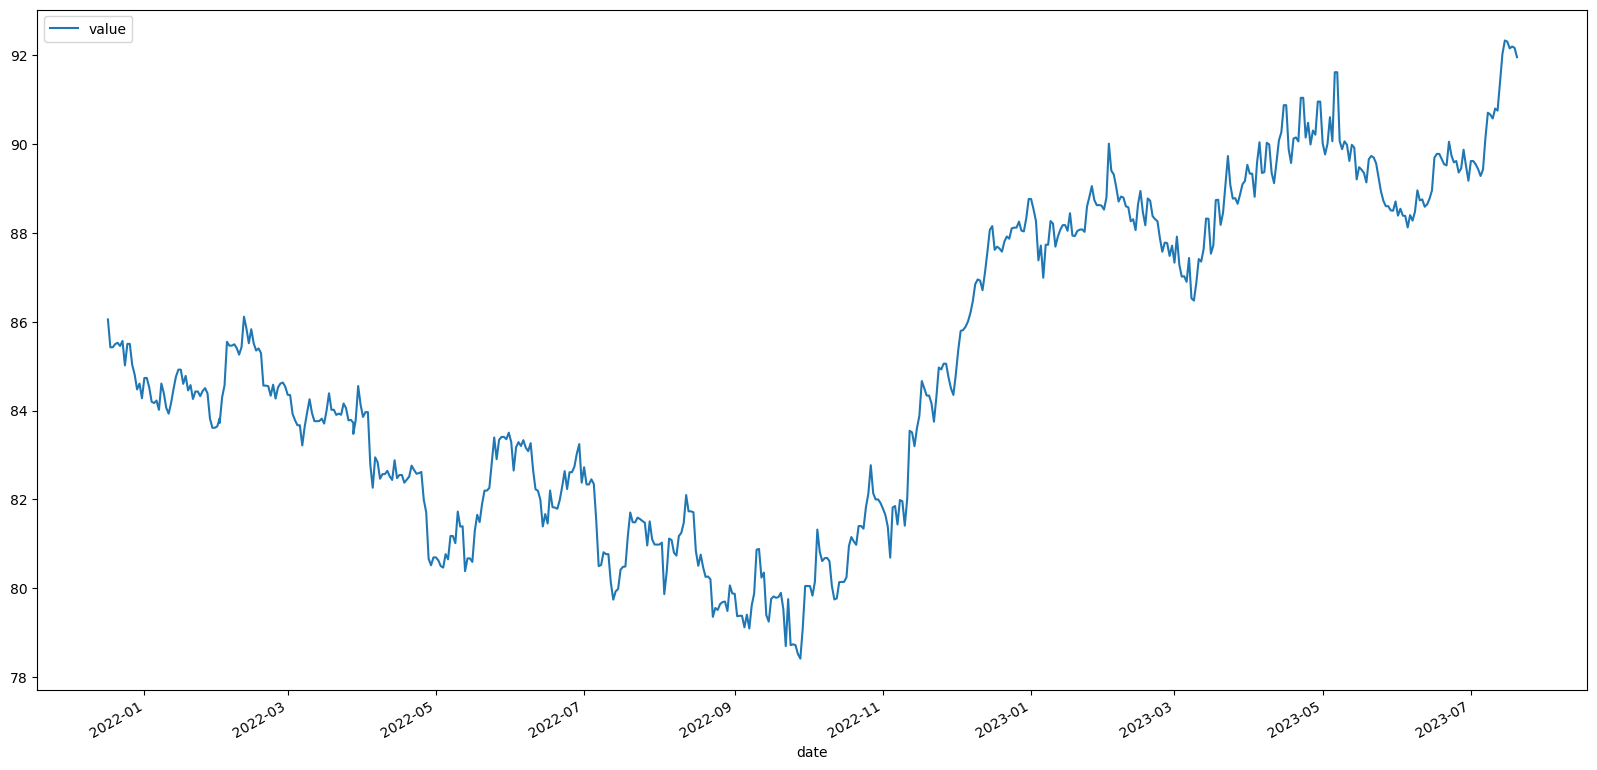

In [5]:
df1.plot(figsize = (20,10))

In [6]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print("ADF statistics: {}" .format(result[0]))
    print("p-value: {}" .format(result[1]))
    if result[1]<=0.05:
        print('strong evidence against the null hypothesis,reject the null hypothesis and it is stationary')
    else:
        print("weak evidence against the null hypothesis and it is not stationary")
    

In [7]:
adf_test(df1["value"])

ADF statistics: -0.3626905595856128
p-value: 0.9161442282405343
weak evidence against the null hypothesis and it is not stationary


In [8]:
df1["first difference"] = df1["value"] - df1["value"].shift(1)
df1.dropna(inplace = True)
adf_test(df1["first difference"])

ADF statistics: -8.36228885872842
p-value: 2.802511292327613e-13
strong evidence against the null hypothesis,reject the null hypothesis and it is stationary


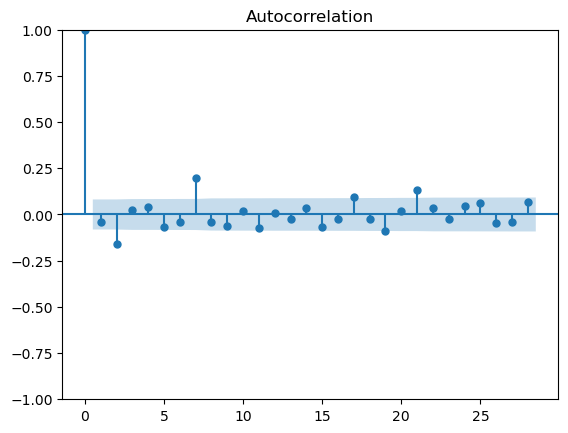

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df1["first difference"])

C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


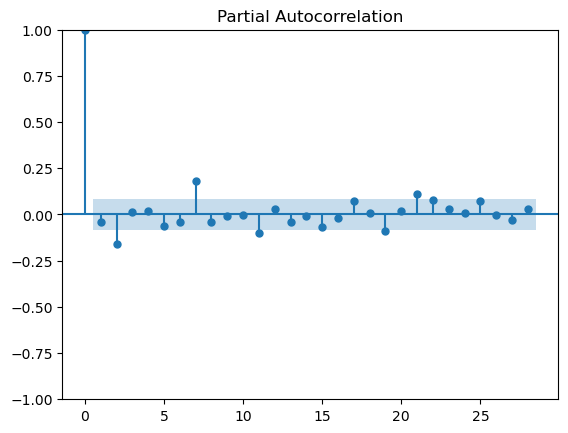

In [10]:
pacf = plot_pacf(df1["first difference"])

In [11]:
from datetime import datetime,timedelta
train_dataset_end = datetime(2022,12,31)
test_dataset_end=datetime(2023,7,20)
train_data = df1[:train_dataset_end]
test_data  = df1[train_dataset_end+timedelta(days = 1):test_dataset_end]
test_data

,value,first difference
date,,
2023-01-01,88.763758,-0.000361
2023-01-02,88.530659,-0.233099
2023-01-03,88.262566,-0.268093
2023-01-04,87.382667,-0.879899
2023-01-05,87.715800,0.333133
...,...,...
2023-07-16,92.310033,-0.026931
2023-07-17,92.158763,-0.151270
2023-07-18,92.200226,0.041463


In [12]:
from statsmodels.tsa.api import ARIMA
model_ARIMA = ARIMA(train_data["value"],order=(10,1,6))

C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
model_arima_fit = model_ARIMA.fit()

C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\DELL\anaconda3\BAWASIR\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  380
Model:                ARIMA(10, 1, 6)   Log Likelihood                -154.804
Date:                Wed, 02 Aug 2023   AIC                            343.608
Time:                        18:14:28   BIC                            410.546
Sample:                             0   HQIC                           370.172
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1006      2.558      0.039      0.969      -4.913       5.115
ar.L2          0.2741      0.635      0.432      0.666      -0.970       1.518
ar.L3          0.0773      0.357      0.217      0.828      -0.622       0.777
ar.L4         -0.4165      0.410     -1.016      0.310      -1.220       0.387
ar.L5          0.3232      0.999      0.324      0.746      -1.635       2.281
ar.L6          0.0484      0.698      0.069      0.945      -1.319       1.416
ar.L7          0.1592      0.152      1.047      0.295      -0.139       0.457
ar.L8         -0.0985      0.380     -0.260      0.795      -0.843       0.646
ar.L9         -0.0893      0.234     -0.381      0.703      -0.548       0.370
ar.L10         0.0383      0.233      0.164      0.870      -0.419       0.495
ma.L1         -0.0929      2.561     -0.036      0.971      -5.112       4.926
ma.L2         -0.3641      0.648     -0.562      0.574      -1.635       0.906
ma.L3         -0.0383      0.510     -0.075      0.940      -1.039       0.962
ma.L4          0.4948      0.392      1.261      0.207      -0.274       1.264
ma.L5         -0.3665      1.155     -0.317      0.751      -2.631       1.897
ma.L6         -0.1088      0.759     -0.143      0.886      -1.596       1.379
sigma2         0.1324      0.009     15.468      0.000       0.116       0.149
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

print(pred_start)
print(pred_end)

2023-01-01 00:00:00
2023-07-20 00:00:00


In [16]:
pred = model_arima_fit.predict(start=0, end=len(test_data)-1, typ='levels')
residuals = test_data["value"]-pred
values = df1["value"]
values

date
2021-12-18    85.424708
2021-12-19    85.424708
2021-12-20    85.497443
2021-12-21    85.525694
2021-12-22    85.454494
                ...    
2023-07-16    92.310033
2023-07-17    92.158763
2023-07-18    92.200226
2023-07-19    92.169605
2023-07-20    91.959697
Name: value, Length: 581, dtype: float64

In [17]:
df1.index.duplicated().sum()

2

In [18]:
df1 = df1[~df1.index.duplicated(keep='first')]

In [19]:
df1.index.duplicated().sum()

0

In [20]:
values = train_data["value"]



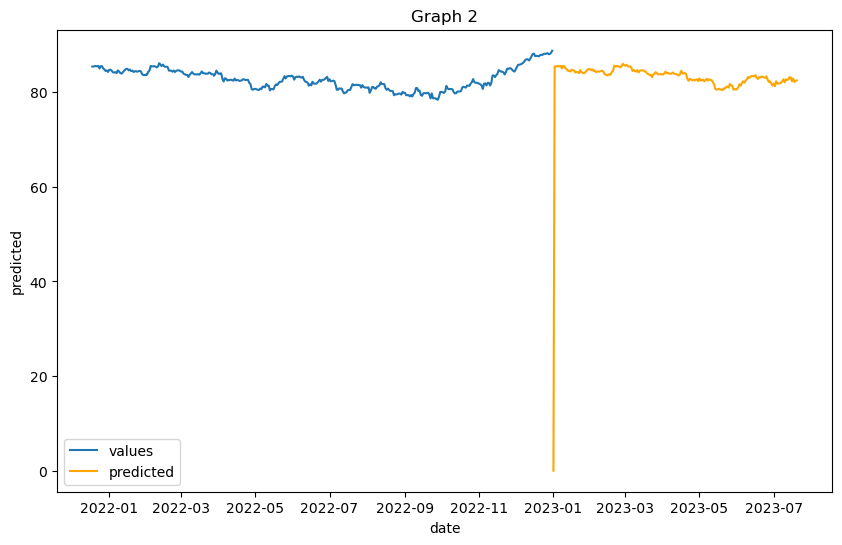

In [21]:
plt.figure(figsize=(10, 6))

# Plot the first graph
plt.plot(train_data.index,values, label='values')
plt.xlabel('dates')
plt.ylabel('values')
plt.title('Graph 1')
plt.legend()

# Plot the second graph on the same subplot
plt.plot(test_data.index, pred, label='predicted', color='orange')
plt.xlabel('date')
plt.ylabel('predicted')
plt.title('Graph 2')
plt.legend()

# Show the plot
plt.show()







In [22]:
pred

date
2021-12-18     0.000000
2021-12-19    85.424708
2021-12-20    85.424707
2021-12-21    85.496040
2021-12-22    85.518584
                ...    
2022-07-01    82.307529
2022-07-02    82.891483
2022-07-03    82.169364
2022-07-04    82.403558
2022-07-05    82.499411
Name: predicted_mean, Length: 201, dtype: float64